In [97]:
import numpy as np
import pandas as pd
import re
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
import os

In [98]:
train = pd.read_csv('/kaggle/input/predictingbookratingsint20h/train.csv', index_col=0)
test = pd.read_csv('/kaggle/input/predictingbookratingsint20h/test.csv', index_col=0)
sub = pd.read_csv('/kaggle/input/predictingbookratingsint20h/submission.csv', index_col=0)

In [99]:
def fill_na(df):
    
    df['book_genre'] = df['book_genre'].fillna('None')
    df['book_format'] = df['book_format'].fillna('None')
    
    return df

In [100]:
train_1 = fill_na(train)
test_1 = fill_na(test)

In [101]:
def make_norm_columns(df):
    
    df['author_list'] = df['book_authors'].apply(lambda x: x.split('|'))
    df['author_count'] = df['author_list'].apply(lambda x: len(x))
    df['genre_list'] = df['book_genre'].apply(lambda x: x.split('|') if x!='None'
                                             else [])
    df['genre_count'] = df['genre_list'].apply(lambda x: len(x))
    
    df['book_pages'] = df['book_pages'].fillna('0 pages')
    df['book_pages'] = df['book_pages'].apply(lambda x: re.findall(r"\d+", x)[0]).astype(int)
    
    return df

In [102]:
train_2 = make_norm_columns(train_1)
test_2 = make_norm_columns(test_1)

In [103]:
author_data = pd.read_csv('../input/goodread-authors/final_dataset.csv')
author_data = author_data.drop_duplicates('name')
author_data = author_data.set_index('name')
at_dict = author_data.to_dict(orient='index')

In [104]:
author_data = pd.read_csv('../input/goodread-authors/final_dataset.csv')
author_data[['name', 'workcount', 'fan_count', 'rating_count', 'review_count', 'average_rate']].to_csv('final_dataset.csv')

In [105]:
author_data

,authorid,name,workcount,fan_count,gender,image_url,about,born,died,influence,average_rate,rating_count,review_count,website,twitter,genre,original_hometown,country,latitude,longitude
0,8409092,Jason Wallace,2,13,male,https://images.gr-assets.com/authors/148926684...,Jason Wallace is related to Tolkien and a desc...,NaN,NaN,NaN,3.74,1028,175,NaN,NaN,NaN,Cheltenham,United Kingdom,51.90006,-2.07972
1,5796406,Rosan Hollak,4,0,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,NaN,NaN,NaN,3.73,15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8421525,Nanna Foss,6,156,female,https://images.gr-assets.com/authors/140908587...,Danish YA writer. <br /><br />I make up storie...,NaN,NaN,NaN,4.35,1172,205,http://www.nannafoss.dk,NaN,"fantasy,fiction,paranormal",NaN,NaN,NaN,NaN
3,158146,Terri Savelle Foy,23,125,female,https://images.gr-assets.com/authors/147569460...,"For years, Terri Savelle Foy’s life was averag...",NaN,NaN,NaN,4.56,1054,151,http://www.terri.com,terrisavellefoy,"religion and spirituality,self help,spirituality",NaN,NaN,NaN,NaN
4,15340731,Vishwas Nangare Patil,1,127,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,NaN,NaN,NaN,4.15,725,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209512,67759,Rosanne Bittner,75,482,female,https://images.gr-assets.com/authors/142798670...,I am a USA-TODAY best-selling authors with 35 ...,NaN,NaN,NaN,4.33,13066,1310,http://www.rosannebittner.com,RosanneBittner,"history,romance","LaPorte, Indiana",United States,41.70754,-86.89503
209513,34924,Richard Bandler,95,242,unknown,https://images.gr-assets.com/authors/141698214...,NaN,NaN,NaN,NaN,4.01,8053,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209514,16617,Norman Bodek,20,7,male,https://s.gr-assets.com/assets/nophoto/user/m_...,"They Always Said, “He Will Never, Ever Make it...",NaN,NaN,NaN,4.06,1594,65,NaN,nbodek,"business,spirituality",new york,United States,40.71427,-74.00597
209515,295802,Augusto Cury,78,253,unknown,https://images.gr-assets.com/authors/131521861...,"Augusto Jorge Cury (Colina, 2 de outubro de 19...",1958-10-02,NaN,NaN,3.82,10450,681,http://www.augustocury.com.br/,NaN,"self help,spirituality",Colina,Macao,22.18306,113.53194


In [106]:
def make_autors_info(x, author_dict=at_dict):
    
    workcount = []
    fan_count = []
    rating_count = []
    review_count = []
    average_rate = [] 
    
    for author in x:
        if author in author_dict.keys():
            workcount.append(author_dict[author].get('workcount'))
            fan_count.append(author_dict[author].get('fan_count'))
            rating_count.append(author_dict[author].get('rating_count'))
            review_count.append(author_dict[author].get('review_count'))
            average_rate.append(author_dict[author].get('average_rate'))

    return {'workcount': np.mean(workcount),
           'fan_count': np.mean(fan_count),
           'rating_count': np.mean(rating_count),
           'review_count': np.mean(review_count),
           'average_rate': np.mean(average_rate)}

In [107]:
def add_author_info(df):
    
    author_inf = df['author_list'].apply(lambda x: make_autors_info(x))
    author_inf = pd.DataFrame(author_inf.tolist())
    df = pd.concat([df, author_inf], axis=1)
    df['desc_len'] = df['book_desc'].apply(lambda x: len(x.split()))
    
    return df
    

In [108]:
train_3 = add_author_info(train_2)
test_3 = add_author_info(test_2)

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [109]:
# top_21st_1500 = pd.read_csv('../input/goodreadsbest1500books/Goodreads_best1500books.csv')

# top_10_list = top_21st_1500.book_name[:10].tolist()
# top_50_list = top_21st_1500.book_name[:50].tolist()
# top_100_list = top_21st_1500.book_name[:100].tolist()
# top_500_list = top_21st_1500.book_name[:500].tolist()
# top_1500_list = top_21st_1500.book_name.tolist()

In [110]:
# def best_21st(df):
    
#     df['top_10'] = df['book_title'].apply(lambda x: int(x in top_10_list))
#     df['top_50'] = df['book_title'].apply(lambda x: int(x in top_50_list))
#     df['top_100'] = df['book_title'].apply(lambda x: int(x in top_100_list))
#     df['top_500'] = df['book_title'].apply(lambda x: int(x in top_500_list))
#     df['top_1500'] = df['book_title'].apply(lambda x: int(x in top_1500_list))
    
#     return df

In [111]:
# train_4 = best_21st(train_3)
# test_4 = best_21st(test_3)

In [112]:
def preprocess_books(column):

    column = column.fillna('None').apply(lambda x: set(re.split(r"\|", x)))

    mlb = MultiLabelBinarizer()
    expandedLabelData = mlb.fit_transform(column)
    labelClasses = mlb.classes_

    expandedLabels = pd.DataFrame(expandedLabelData, columns=labelClasses)
    
    return expandedLabels

In [113]:
# def genres_popularity(train, test):
#     all_genres = np.concatenate([np.concatenate(train['genre_list'].values), 
#                                  np.concatenate(test['genre_list'].values)])
#     genres, counts = np.unique(all_genres, return_counts=True)
#     return pd.DataFrame({'genre':genres, 'counts':counts}).sort_values(by='counts', ascending=False)

# genres_pop = genres_popularity(train_3, test_3)
# genres_pop = genres_pop.head(200)

# train_3['two_genre'] = train_3['book_genre'].str.split('|').apply(lambda x: genres_pop[genres_pop['genre'].isin(x)].head(2)['genre'].values)
# train_3['1_genre'] = train_3['two_genre'].apply(lambda x: x[0] if x else 'None')
# train_3['2_genre'] = train_3['two_genre'].apply(lambda x: x[1] if x else 'None')

# test_3['two_genre'] = test_3['book_genre'].str.split('|').apply(lambda x: genres_pop[genres_pop['genre'].isin(x)].head(2)['genre'].values)
# test_3['1_genre'] = test_3['two_genre'].apply(lambda x: x[0] if x else 'None')
# test_3['2_genre'] = test_3['two_genre'].apply(lambda x: x[1] if x else 'None')


In [114]:
train = train_3.copy()
test = test_3.copy()

In [115]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity

# tf = TfidfVectorizer(ngram_range = (1,2), stop_words = 'english')
# tfidf_matrix = tf.fit_transform(train_3['book_title'])
# cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [116]:
# titles = train_3['book_title']
# indices = pd.Series(train_3.index, index = train_3['book_title']) #converting all titles into a Series

# #Function that gets book recommendations based on the cosine similarity score of book titles
# def book_recommendations(title, n):
#     idx = indices[title]
#     sim_scores = list(enumerate(cosine_sim[idx]))
#     sim_scores = sorted(sim_scores, key = lambda x:x[1], reverse = True)
#     sim_scores = sim_scores[1:n+1]
#     book_indices = [i[0] for i in sim_scores]
#     return titles.iloc[book_indices]

In [117]:
# book_index = 10
# n = 20

# print(train_3['book_title'][book_index])
# book_recommendations(train_3.book_title[book_index],n)

In [118]:
# genres = genres_train.sum(axis=0).sort_values().to_frame()
# genres.to_csv('genres.csv')

In [119]:
train_cols = ['book_format', 'book_pages','book_review_count','book_rating_count', 
              'author_count', 'genre_count', 'workcount', 'fan_count', 'rating_count', 'review_count', 'average_rate']

X = train[train_cols]
test_crop = test[train_cols]

genres_test = preprocess_books(test['book_genre'])
genres_train = preprocess_books(train['book_genre'])

genres_cols = list(set(genres_train.columns) & set(genres_test.columns))

genres_train = genres_train[genres_cols]
genres_test = genres_test[genres_cols]

X = pd.concat([X,genres_train], axis=1)
test_crop = pd.concat([test_crop,genres_test], axis=1)

y = train['book_rating']

In [120]:
def fast_drop(X,y,model,cv,alpha,n_loops):
    drop_rate = 0
    for j in range(n_loops):
        cols_list=list(X.columns)
        X=X[random.sample(cols_list,len(cols_list))]
        X = X.reindex(columns=random.shuffle(X.columns.to_list()))
        alpha = alpha/2#(2**drop_rate)
        drop_list=[]
        print(f"Number of columns:{len(X.columns)}, alpha:{alpha}")
        baseline = calc(X,y,test_crop, model, cv)
        i=0
        for col in X:
            i+=1
            dropped_res = calc(X.drop(col,axis=1),y,test_crop, model, cv)
            print(f"{i}. drop:{col}, res:{dropped_res}, baseline:{baseline}, delta:{round(dropped_res-baseline,8)}")
            if dropped_res-baseline>alpha:
                X = X.drop(col,axis=1)
                baseline = dropped_res
                drop_list.append(col)
                print('   Dropped!')
        print(f"\nDropped columns:{drop_list}\n")
        drop_rate+=1

In [121]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor, plot_importance
from sklearn.metrics import mean_squared_error
seed=47

model = LGBMRegressor(random_state=seed)
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

In [122]:
def calc(X, y, test, model, cv):
    cat_columns = ['book_format']
    for col in cat_columns:
        X[col] = X[col].astype('category')
        test[col] = test[col].astype('category')
        
    res=[]
    probs=pd.DataFrame()

    for i, (tdx, vdx) in enumerate(cv.split(X, y)):
        X_train, X_valid, y_train, y_valid = X.iloc[tdx], X.iloc[vdx], y[tdx], y[vdx]
        model.fit(X_train, y_train)
        
        preds = model.predict(X_valid)
        oof_predict = model.predict(test)
        probs['fold_%i'%i] = oof_predict
        res.append(mean_squared_error(y_valid, preds))
        print(f'{i+1} Fold: {round(mean_squared_error(y_valid, preds), 4)}')
    print('RMSE:', round(np.mean(res), 4))    
    
    plot_importance(model, max_num_features=10)
    
    return probs.mean(axis=1)

1 Fold: 0.0544
2 Fold: 0.0514
3 Fold: 0.054
4 Fold: 0.0562
5 Fold: 0.0561
RMSE: 0.0544


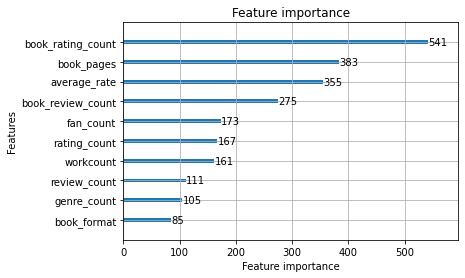

In [123]:
probs = calc(X=X, y=y, model=model, cv=kfold, test=test_crop)
sub['book_rating'] = probs
sub.to_csv('sub_with_authors.csv')

In [124]:
pkl_filename = "lgmb_model.pkl"
import pickle
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [125]:
# 1 Fold: 0.0544
# 2 Fold: 0.0514
# 3 Fold: 0.0538
# 4 Fold: 0.0562
# 5 Fold: 0.0562
# RMSE: 0.0544

In [126]:
# baseline 3 cols: RMSE: 0.094165
# 3 cols + all genres: RMSE: 0.077962
# 3 cols + top_50 genres: RMSE: 0.082198
# author features + leak: RMSE: 0.0545
# author features: RMSE: 0.0747
# add ca column: RMSE: 0.0742